In [1]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)


In [2]:
mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Opto_Data_CLa13.mat")

In [3]:
mat_data["S"][0][1].shape

(101, 5963)

In [28]:
trainS = np.concatenate((mat_data["S"][0][0],mat_data["S"][0][1],mat_data["S"][0][2],mat_data["S"][0][3]),axis = 1)

In [29]:
trainS = torch.tensor(trainS)

In [33]:
type(trainS)

torch.Tensor

In [30]:
trainO = np.concatenate((mat_data["opt"][0][0],mat_data["opt"][0][1],mat_data["opt"][0][2],mat_data["opt"][0][3]),axis = 1)

In [19]:
trainO.shape

(1, 23849)

In [31]:
m, k1, k2 = 101, 20, 5
net = Neural_NMF([m, k1, k2])

In [36]:
history = train(net, trainS, epoch=50, lr=500, supervised=False)

100%|██████████| 50/50 [04:28<00:00,  5.37s/it]


In [42]:
history[0][1].shape

torch.Size([20, 5])

In [39]:
A = history[0][1]
S = history[1][1]

In [40]:
A1 = A.detach().numpy()
S1 = S.detach().numpy()

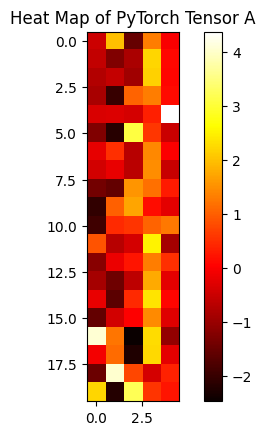

In [41]:
plt.imshow(A1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

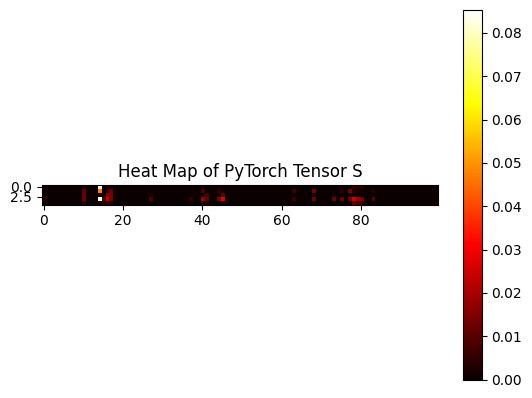

In [43]:
plt.imshow(S1[:,100:200], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [44]:
count_ones = np.count_nonzero(trainO == 1)
count_ones

379

In [45]:
indices = np.where(trainO == 1)[1]

In [46]:
slices = []
for idx in indices:
    # Ensure we do not go out of bounds
    if idx + 10 <= S1.shape[1]:
        slices.append(S1[:, idx:idx+10])
    else:
        slices.append(S1[:, idx:])

In [47]:
C = np.hstack(slices) if slices else np.array([])

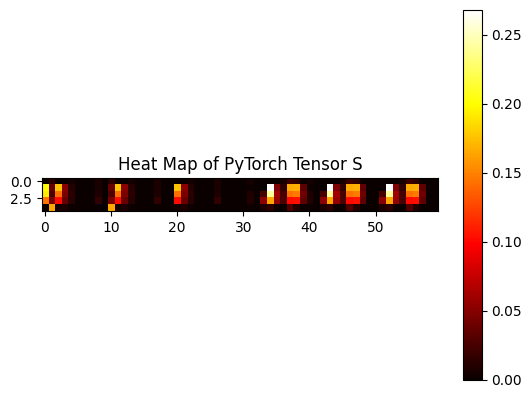

In [55]:
i = 60
plt.imshow(C[:,i:i+60], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [ ]:
import time
from IPython.display import display, clear_output

for i in range(0,200,10):
    plt.figure()
    plt.imshow(C[:,i:i+60], cmap='hot', interpolation='nearest')
    plt.colorbar()  # Show color scale
    plt.title('Heat Map of PyTorch Tensor S')
    display(plt.gcf())
    time.sleep(1)
    clear_output(wait=True)



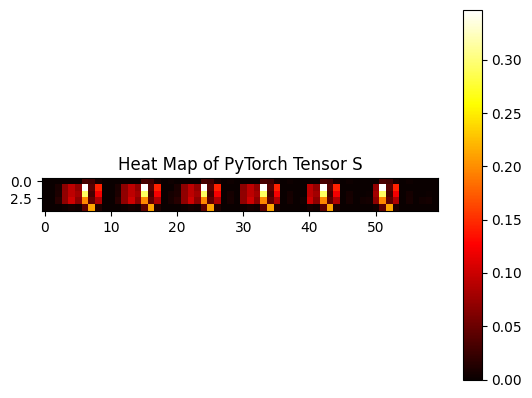

In [67]:
import matplotlib.animation as animation
from PIL import Image


fig, ax = plt.subplots()

# Create an initial heatmap
heatmap = ax.imshow(C[:, 0:60], cmap='hot', interpolation='nearest')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Update function for animation
def update(frame):
    ax.clear()
    heatmap = ax.imshow(C[:, frame:frame+60], cmap='hot', interpolation='nearest')
    plt.title('Heat Map of PyTorch Tensor S')
    return heatmap,

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(0, 200, 10), blit=True)

# Save the animation as a GIF
ani.save('heat_map_animation.gif', writer='pillow', fps=1)

plt.show()